In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches

In [2]:
df = pd.read_csv('HR Employee Attrition.csv').drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis=1)

범주형, binary 전처리

In [3]:
continuous_column = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate",
                     "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear",
                     "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

binary_column = ["Attrition", "Gender", "OverTime", "PerformanceRating"]
df[binary_column] = df[binary_column].replace({"Yes":1, "No":0, "Male":1, "Female":0, 3:0, 4:1})

category_column = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
df[category_column] = df[category_column].replace({"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2,
                                                   "Research & Development":0, "Sales":1, "Human Resources":2,
                                                   "Life Sciences":0, "Medical":1, "Marketing":2, "Technical Degree":3, "Other":4,
                                                   "Sales Executive":0, "Research Scientist":1, "Laboratory Technician":2, "Manufacturing Director":3, "Healthcare Representative":4,
                                                   "Healthcare Representitive":5, "Manager":6, "Sales Representative":7, "Research Director":8, "Human Resources":9,
                                                   "Single":0, "Married":1, "Divorced":2})

ordinary_column = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction",
                   "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]

df["NumCompaniesWorked"] = df["NumCompaniesWorked"].replace({0:1})

Pearson 상관관계 계수 Heatmap

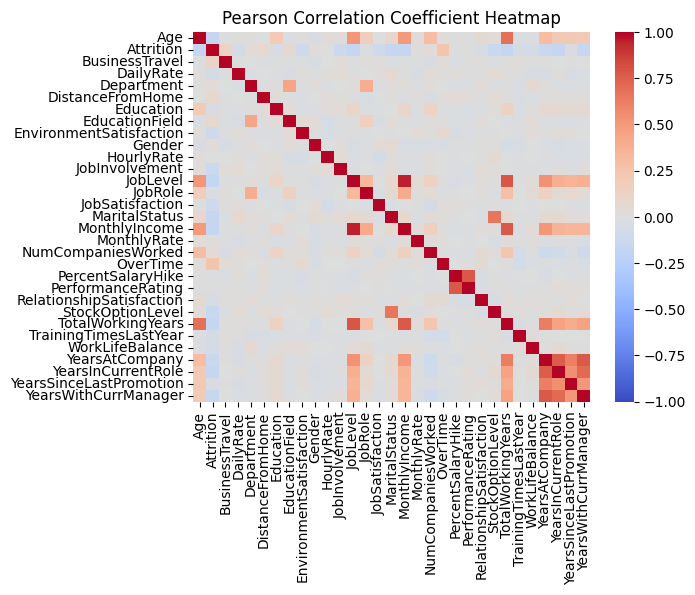

In [4]:
corr_matrix = df.corr("pearson")
sns.heatmap(corr_matrix,cmap="coolwarm",vmin=-1.0, vmax=1.0)
plt.xticks(ticks=np.array(range(len(corr_matrix)))+0.5,labels=corr_matrix.columns)
plt.yticks(ticks=np.array(range(len(corr_matrix)))+0.5,labels=corr_matrix.index)
plt.title("Pearson Correlation Coefficient Heatmap")
plt.show()

종류별 상관계수

C:\Users\LG\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\LG\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


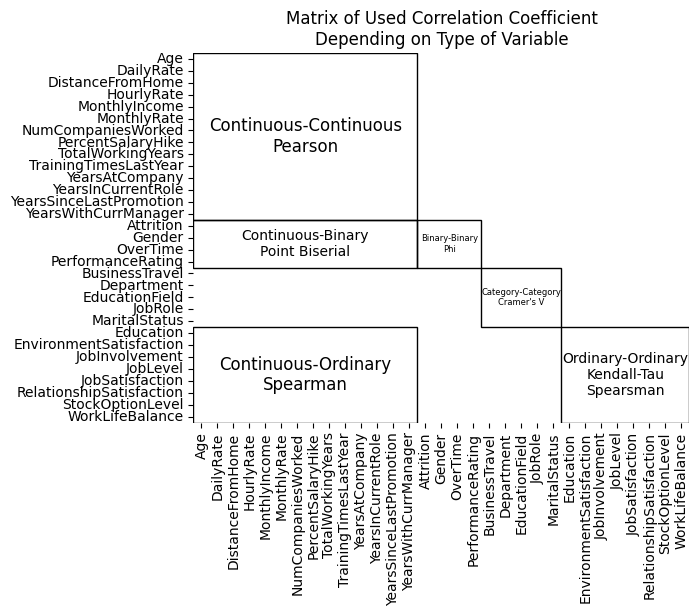

In [5]:
group_by_col = pd.DataFrame(index=continuous_column+binary_column+
                            category_column+ordinary_column,
                            columns=continuous_column+binary_column+
                            category_column+ordinary_column).astype(float)
sns.heatmap(group_by_col, cbar=False)
plt.xticks(ticks=np.array(range(len(group_by_col)))+0.5,labels=group_by_col.columns)
plt.yticks(ticks=np.array(range(len(group_by_col)))+0.5,labels=group_by_col.index)
plt.title("Matrix of Used Correlation Coefficient\nDepending on Type of Variable")

pearson = patches.Rectangle((0.0,0.0),
                         len(continuous_column),len(continuous_column),
                         edgecolor="black",fill=False)
PB = patches.Rectangle((0.0,len(continuous_column)),
                         len(continuous_column),len(binary_column),
                         edgecolor="black",fill=False)
spearman = patches.Rectangle((0.0,len(continuous_column+binary_column+category_column)),
                         len(continuous_column),len(ordinary_column),
                         edgecolor="black",fill=False)
phi = patches.Rectangle((len(continuous_column),len(continuous_column)),
                         len(binary_column),len(binary_column),
                         edgecolor="black",fill=False)
cramerV = patches.Rectangle((len(continuous_column+binary_column),len(continuous_column+binary_column)),
                         len(category_column),len(category_column),
                         edgecolor="black",fill=False)
kendall_tau = patches.Rectangle((len(continuous_column+binary_column+category_column),len(continuous_column+binary_column+category_column)),
                         len(ordinary_column),len(ordinary_column),
                         edgecolor="black",fill=False)

plt.gca().text(x=pearson.get_width()/2,y=pearson.get_height()/2,
               s="Continuous-Continuous\nPearson", horizontalalignment="center",
               verticalalignment="center", fontsize=12)
plt.gca().text(x=(PB.get_width()/2+PB.get_x()),y=(PB.get_height()/2+PB.get_y()),
               s="Continuous-Binary\nPoint Biserial", horizontalalignment="center",
               verticalalignment="center", fontsize=10)
plt.gca().text(x=(spearman.get_width()/2+spearman.get_x()),y=(spearman.get_height()/2+spearman.get_y()),
               s="Continuous-Ordinary\nSpearman", horizontalalignment="center",
               verticalalignment="center", fontsize=12)
plt.gca().text(x=(phi.get_width()/2+phi.get_x()),y=(phi.get_height()/2+phi.get_y()),
               s="Binary-Binary\nPhi", horizontalalignment="center",
               verticalalignment="center", fontsize=6)
plt.gca().text(x=(cramerV.get_width()/2+cramerV.get_x()),y=(cramerV.get_height()/2+cramerV.get_y()),
               s="Category-Category\nCramer's V", horizontalalignment="center",
               verticalalignment="center", fontsize=6)
plt.gca().text(x=(kendall_tau.get_width()/2+kendall_tau.get_x()),y=(kendall_tau.get_height()/2+kendall_tau.get_y()),
               s="Ordinary-Ordinary\nKendall-Tau\nSpearsman", horizontalalignment="center",
               verticalalignment="center", fontsize=10)

plt.gca().add_patch(pearson)
plt.gca().add_patch(PB)
plt.gca().add_patch(spearman)
plt.gca().add_patch(phi)
plt.gca().add_patch(cramerV)
plt.gca().add_patch(kendall_tau)
plt.show()